# PHẦN 0 - KIỂM TRA PHIÊN BẢN CỦA THƯ VIỆN TENSORFLOW VÀ KERAS

Trong bài tập này, chúng ta chỉ sẽ sử dụng thiết bị `CPU`. Bạn phải sử dụng phiên bản `2.15.0` của `TensorFlow` (đây cũng là phiên bản của môi trường `Google Colab` hiện tại). Trong trường hợp môi trường `Python 3` của bạn chưa có thư viện `TensorFlow` theo như yêu cầu, bạn cài đặt bằng cách thực hiện lệnh sau `pip install tensorflow==2.15.0`.

In [5]:
# Kiểm tra phiên bản của thư viện TensorFlow và in ra danh sách các thiết bị.
!python -c 'import tensorflow; print(tensorflow.__version__); print(tensorflow.config.list_physical_devices())'

  File "<string>", line 1
    'import
    ^
SyntaxError: unterminated string literal (detected at line 1)


In [6]:
# Kiểm tra phiên bản của thư viện Keras.
!python -c 'import keras; print(keras.__version__)'

  File "<string>", line 1
    'import
    ^
SyntaxError: unterminated string literal (detected at line 1)


## PHẦN 1 - CÀI ĐẶT MÔ HÌNH LINEAR REGRESSION VỚI KERAS

Một mô hình máy học cần có đủ ít nhất 7 phương thức sau:
- `__init__`: hàm constructor trong hướng đối tượng, được sử dụng để khởi tạo các tham số mặc định hoặc tham số bắt đầu một mô hình. Trong những bài tập đầu tiên, để đơn giản constructor sẽ không sử dụng.
- `build`: xây dựng kiến trúc của mô hình
- `train`: bắt đầu quá trình huấn luyện mô hình
- `save`: lưu lại mô hình sau khi đã huấn luyện
- `load`: load lên mô hình từ file đã huấn luyện (pretrained)
- `summary`: in tóm tắt kiến trúc mô hình
- `predict`: dự đoán giá trị output từ dữ liệu đầu vào

In [7]:
# Mô hình cài đặt tổng quát bao gồm 7 phương thức cơ bản
# Lưu ý: mô hình này chỉ mang tính gợi ý, không bắt buộc
# Tuy nhiên, trong phần bài tập cần tuân theo các tên phương thức này
class MyModel:
    # constructor
    def __init__(self):
        return None

    # Implement architecture of the model
    def build(self):
        return None

    # Train the defined model with training and validation data
    def train(self):
        return None

    # Save the trained model to file
    def save(self, model_path):
        return None

    # Load pretrained model from file
    def load(self):
        return None

    # Visualize your model
    def summary(self):
        return None

    # Apply your model with new input data
    def predict(self):
        return None

## 1. Import các thư viện Keras

Đầu tiên, ta sẽ import các thư viện, module, hàm của `Keras`:
- `Input`: để nhận dữ liệu đầu vào cho mô hình
- `Dense`: hay còn gọi là lớp Fully Connected (Lớp kết nối đầy đủ), một thành phần quan trọng của các mô hình dựa trên mạng Neural Network.
- `Model`: đây là lớp đối tượng mô hình được sử dụng để đóng gói lớp đầu vào, đầu ra, sau đó huấn luyện với phương thức `fit` và dự đoán kết quả với `predict`.
- `load_model`: hàm sử dụng để load mô hình lên từ file

In [8]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model

## 2. Cài đặt mô hình Linear Regression
Tiếp theo, ta sẽ dựa trên khung đối tượng `MyModel` đã trình bày ở mục trước để tiến hành cài đặt mô hình **Linear Regression**. Phương thức chính mà bài tập này cần thực hiện là `def build()`. Các phương thức còn lại đã được cài đặt sẵn, các bạn cần đọc, hiểu ý nghĩa và cách thức sử dụng về sau.

<p align="center">
  <img src="./images/LinearReg.png" />
</p>

In [9]:
# Linear Regression
class LinearRegression:
    def __init__(self): # Self is similar to your 'this' pointer in C++
        return None

    def build(self, input_dim):

        self.model = None
        # Hãy cài đặt để định nghĩa KIẾN TRÚC MÔ HÌNH và lưu ở thuộc tính `self.model`
        # với các biến đối tượng sau:
        #  - tạo biến `input` với lớp đối tượng `Input` của Keras,
        #    truyền vào kích thước đầu vào `input_dim`
        #  - tạo biến `output` với lớp đối tượng `Dense` của Keras,
        #    truyền vào các tham số:  kích thước output, có sử dụng bias,
        #    không sử dụng hàm activation
        # Sau bước này, self.model sẽ đóng gói 2 biến `input` và `output` để tạo thành mô hình
        ### BEGIN SOLUTION
        input = Input(shape=(input_dim,))
        output = Dense(units=1, use_bias=True, activation=None)(input)       
        ### END SOLUTION
        self.model = Model(input, output)
        return self.model

    def train(self, x_train, y_train):
        opt = tf.keras.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='mse') # MSE: mean squared error or L2 distance # (y~ - y)^2
        return self.model.fit(x_train, y_train, epochs=30)

    def save(self, model_file):
        return self.model.save(model_file)

    def load(self, model_file):
        self.model = load_model(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
        return self.model.predict(x_test)

    def get_weights(self):
        return self.model.layers[1].get_weights()

Tiếp theo, ta sẽ khởi tạo đối tượng LinearRegression và kiểm tra thử xem phương `build` đã cài đặt chính xác chưa.

In [10]:
lr = LinearRegression()
# Trong ví dụ này, ta sẽ khởi tạo input là một vector 1000 chiều:
lr.build(1000)

<Functional name=functional, built=True>

In [ ]:
# # Public Test
# assert len(lr.model.layers) == 2
# assert str(type(lr.model.layers[0])).endswith("input_layer.InputLayer'>") == True
# assert str(type(lr.model.layers[1])).endswith("core.dense.Dense'>") == True
# assert lr.model.layers[0].input_shape[0][1] == 1000

AttributeError: 'InputLayer' object has no attribute 'input_shape'

## 3. Tạo dữ liệu mẫu (toy example)
Bước tiếp theo, ta sẽ tiến hành tạo mẫu dữ liệu để huấn luyện và kiểm thử.

Dữ liệu được tạo ra là các điểm xoay xung quanh một đường thẳng với một số nhiễu

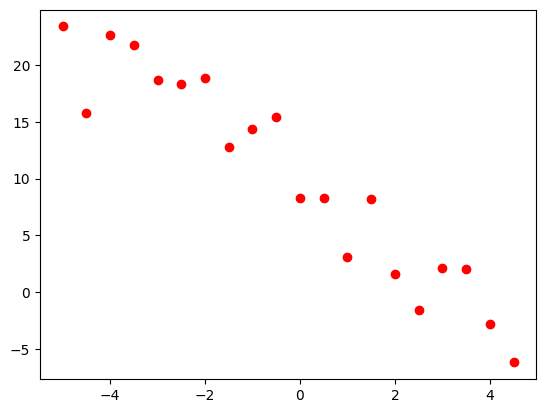

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Khởi tạo các điểm xung quanh đường thẳng y = -3*x + 10
x = np.arange(-5, 5, 0.5)
n = len(x) # Số mẫu dữ liệu

std = 2 # tham số thể hiện mức độ nhiễu nhiều hay ít. Càng lớn càng nhiễu
y = -3*x + 10 + np.random.normal(0, std, n)

# Trực quan hóa dữ liệu bằng các hình tròn màu đỏ
plt.plot(x, y, 'ro')
plt.show()

In [14]:
lr = LinearRegression()

# Hãy gọi phương thức `build` cho đối tượng `lr` và truyền tham số đầu vào
# tương ứng với dữ liệu train đã phát sinh ở code block trên
# Theo bạn, `input_dim` bằng bao nhiêu?

### BEGIN SOLUTION
input_dim = lr.build(1)
### END SOLUTION

# Để hiển thị kiến trúc của mô hình ta gọi phương thức `summary`
print("The architecture of Linear Regression model: ")
lr.summary()

The architecture of Linear Regression model: 


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Để huấn luyện mô hình ta gọi phương thức `train` với dữ liệu mẫu đã tạo được
# Nếu bước `build` mô hình gọi đúng thì bước `train` sau sẽ thực hiện thành công
hist = lr.train(x, y)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 182.1884
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 103.7796
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 62.0696
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 39.2388
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 26.3862
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.9594
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.5680
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.9205
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.2989
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.2934
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.6639
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.2670
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.0154
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.8554
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.7532
Epoch 16/30
1/1 ━━━━━━

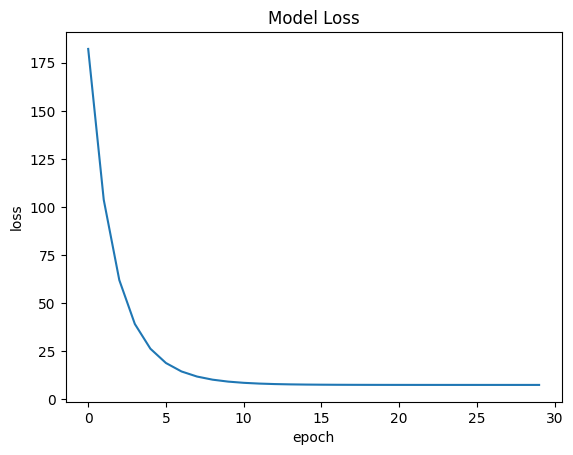

In [16]:
# Hiển thị loss theo số epoch
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# # Sau khi đã huấn luyện, ta lưu mô hình về để sau này tái sử dụng
# # Lưu ý: hai phương thức lưu mô hình `save` và tải mô hình lên 'load'
# # được sử dụng khi muốn tái sử dụng nhiều lần mà KHÔNG CẦN PHẢI HUẤN LUYỆN LẠI
lr.save('linear_regression_model.h5')

## 5. Trực quan hóa mô hình và dự đoán với dữ liệu test

In [41]:
# Khởi tạo đối tượng mới và gọi phương thức load mô hình từ file
pretrain_lr = LinearRegression()
pretrain_lr = load_model('linear_regression_model.h5', compile=False)

In [42]:
theta = pretrain_lr.get_weights()
print('Tham số tối ưu: ')
print(theta)
bias = theta[1][0] # bias chính là theta0 trong mô hình gốc
theta1 = theta[0][0][0]
print('Trong đó: ')
print('   - bias (hệ số tự do) : ', bias)
print('   - theta (hệ số cho dữ liệu đầu vào): ', theta1)

Tham số tối ưu: 
[array([[-2.9554539]], dtype=float32), array([9.507911], dtype=float32)]
Trong đó: 
   - bias (hệ số tự do) :  9.507911
   - theta (hệ số cho dữ liệu đầu vào):  -2.9554539


Như ta có thể thấy, tham số tối ưu xấp xỉ với mô hình gốc được sử dụng để khởi tạo dữ liệu:

`y = -3*x + 10 + np.random.normal(0, std, n)`

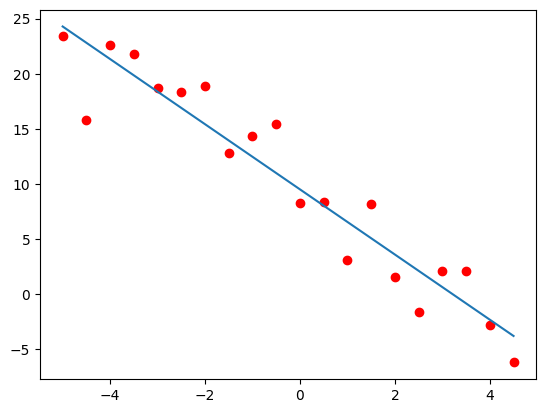

In [44]:
# Trực quan hóa dữ liệu và mô hình sau khi huấn luyện
plt.plot(x, y, 'ro')

# Trực quan hóa mô hình
plt.plot([x[0],x[-1]], [theta1*x[0]+bias, theta1*x[-1]+bias])
plt.show()

Như vậy ta có thể thấy rằng, các hệ số đã huấn luyện tương ứng đã tạo thành phương trình đường thẳng đi qua các điểm mẫu huấn luyện.

Tiếp theo, ta sẽ thử nghiệm với dữ liệu x_test với 2 trường hợp: -4, 0 và 4.

Dựa trên biểu đồ, ta đoán rằng y_test sẽ nhận giá trị lân cận các giá trị
trên 20, xấp xỉ 10 và 0.

In [45]:
x_test = [-4, 0, 4]
y_pred = pretrain_lr.predict(x_test)

print("Các giá trị mà mô hình hồi quy dự đoán trên x_test: ", x_test)
print(y_pred)

ValueError: Unrecognized data type: x=[-4, 0, 4] (of type <class 'list'>)

Các giá trị này khá khớp với giá trị dự đoán ở trên.

# PHẦN 2 - CÀI ĐẶT MÔ HÌNH LOGISTIC REGRESSION VỚI KERAS

Một mô hình máy học cần có đủ ít nhất 7 phương thức sau:
- `__init__`: hàm constructor trong hướng đối tượng, được sử dụng để khởi tạo các tham số mặc định hoặc tham số bắt đầu một mô hình. Trong những bài tập đầu tiên, để đơn giản constructor sẽ không sử dụng.
- `build`: xây dựng kiến trúc của mô hình
- `train`: bắt đầu quá trình huấn luyện mô hình
- `save`: lưu lại mô hình sau khi đã huấn luyện
- `load`: load lên mô hình từ file đã huấn luyện (pretrained)
- `summary`: in tóm tắt kiến trúc mô hình
- `predict`: dự đoán giá trị output từ dữ liệu đầu vào

In [ ]:
# Mô hình cài đặt tổng quát bao gồm 7 phương thức cơ bản
# Lưu ý: mô hình này chỉ mang tính gợi ý, không bắt buộc
# Tuy nhiên, trong phần bài tập cần tuân theo các tên phương thức này
class MyModel:
    # constructor
    def __init__(self):
        return None

    # Implement architecture of the model
    def build(self):
        return None

    # Train the defined model with training and validation data
    def train(self):
        return None

    # Save the trained model to file
    def save(self, model_path):
        return None

    # Load pretrained model from file
    def load(self):
        return None

    # Visualize your model
    def summary(self):
        return None

    # Apply your model with new input data
    def predict(self):
        return None

## 1. Import các thư viện Keras

Đầu tiên, ta sẽ import các thư viện, module, hàm của `Keras`:
- `Input`: để nhận dữ liệu đầu vào cho mô hình
- `Dense`: hay còn gọi là lớp Fully Connected (Lớp kết nối đầy đủ), một thành phần quan trọng của các mô hình dựa trên mạng Neural Network.
- `Model`: đây là lớp đối tượng mô hình được sử dụng để đóng gói lớp đầu vào, đầu ra, sau đó huấn luyện với phương thức `fit` và dự đoán kết quả với `predict`.
- `load_model`: hàm sử dụng để load mô hình lên từ file

In [ ]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model

## 2. Cài đặt mô hình Logistic Regression
Tiếp theo, ta sẽ dựa trên khung đối tượng `MyModel` đã trình bày ở mục trước để tiến hành cài đặt mô hình **Logistic Regression**. Phương thức chính mà bài tập này cần thực hiện là `def build()`. Các phương thức còn lại đã được cài đặt sẵn, các bạn cần đọc, hiểu ý nghĩa và cách thức sử dụng về sau.

<p align="center">
  <img src="./images/LogisticReg.png" />
</p>

In [ ]:
# Logistic Regression
class LogisticRegression:
    def __init__(self): # Self is similar to your 'this' pointer in C++
        return None

    def build(self, input_dim):

        self.model = None
        # Hãy cài đặt để định nghĩa KIẾN TRÚC MÔ HÌNH và lưu ở thuộc tính `self.model`
        # với các biến đối tượng sau:
        #  - tạo biến `input` với lớp đối tượng `Input` của Keras,
        #    truyền vào kích thước đầu vào `input_dim`
        #  - tạo biến `output` với lớp đối tượng `Dense` của Keras,
        #    truyền vào các tham số:  kích thước output, có sử dụng bias,
        #    CÓ SỬ DỤNG hàm activation là `sigmoid`
        # Sau bước này, self.model sẽ đóng gói 2 biến `input` và `output` để tạo thành mô hình
        ### BEGIN SOLUTION
        input = Input(shape=(input_dim,))
        output = Dense(units=1, use_bias=True, activation='sigmoid')(input)
    
        ### END SOLUTION
        self.model = Model(input, output)
        return self.model

    def train(self, x_train, y_train):
        opt = tf.keras.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='binary_crossentropy') # BCE loss
        return self.model.fit(x_train, y_train, epochs=50)

    def save(self, model_file):
        return self.model.save(model_file)

    def load(self, model_file):
        self.model = load_model(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
        return self.model.predict(x_test)

    def get_weights(self):
        return self.model.layers[1].get_weights()

Tiếp theo, ta sẽ khởi tạo đối tượng LogisticRegression và kiểm tra thử xem phương `build` đã cài đặt chính xác chưa.

In [ ]:
lr = LogisticRegression()
# Trong ví dụ này, ta sẽ khởi tạo input là một vector 1000 chiều:
lr.build(1000)

<Functional name=functional_2, built=True>

In [ ]:
# Public Test
assert len(lr.model.layers) == 2
assert str(type(lr.model.layers[0])).endswith("input_layer.InputLayer'>") == True
assert str(type(lr.model.layers[1])).endswith("core.dense.Dense'>") == True
assert lr.model.layers[0].input_shape[0][1] == 1000
assert lr.model.layers[1].activation(0.0).numpy() == 0.5

AttributeError: 'InputLayer' object has no attribute 'input_shape'

## 3. Tạo dữ liệu mẫu (toy example)
Bước tiếp theo, ta sẽ tiến hành tạo mẫu dữ liệu để huấn luyện và kiểm thử.

Dữ liệu được tạo ra là 02 cụm điểm ngẫu nhiên xung quanh hai tâm cụm:
- [1, 5]
- [5, 1]

Lưu ý rằng, hai điểm này đủ cách xa để khi các điểm ngẫu nhiên phát sinh không giao thoa với nhau.

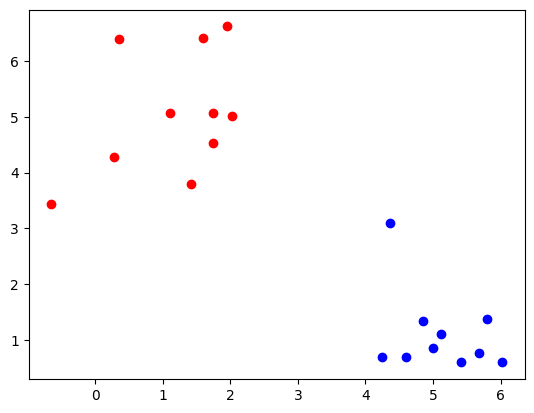

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_sample = 10

# Tạo bộ dữ  liệu gồm 2 tập đỏ và xanh
red_points = np.random.randn(n_sample, 2) + np.array([[1,5]])
blue_points = np.random.randn(n_sample, 2) + np.array([[5,1]])
x_train = np.concatenate((red_points, blue_points))
y_train = np.concatenate((np.ones(n_sample), np.zeros(n_sample)))

# Tạo tập dữ liệu validation
red_points_test = np.random.randn(n_sample, 2) + np.array([[1,5]])
blue_points_test = np.random.randn(n_sample, 2) + np.array([[5,1]])
x_test = np.concatenate((red_points_test, blue_points_test))
y_test = np.concatenate((np.ones(n_sample), np.zeros(n_sample)))

# Trực quan hóa dữ liệu bằng các hình tròn màu đỏ, xanh
plt.plot(red_points[:,0], red_points[:,1], 'ro')
plt.plot(blue_points[:,0], blue_points[:,1], 'bo')

In [ ]:
lr = LogisticRegression()

# Hãy gọi phương thức `build` cho đối tượng `lr` và truyền tham số đầu vào
# tương ứng với dữ liệu train đã phát sinh ở code block trên
# Theo bạn, `input_dim` bằng bao nhiêu?

### BEGIN SOLUTION
input_dim = lr.build(2)
### END SOLUTION

# Để hiển thị kiến trúc của mô hình ta gọi phương thức `summary`
print("Kiến trúc của mô hình Logistic Regression: ")
lr.summary()

Kiến trúc của mô hình Logistic Regression: 


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Để huấn luyện mô hình ta gọi phương thức `train` với dữ liệu mẫu đã tạo được
# Nếu bước `build` mô hình gọi đúng thì bước `train` sau sẽ thực hiện thành công
hist = lr.train(x_train, y_train)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 1.1234
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6658
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4198
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3118
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2567
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2221
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1972
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1781
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1627
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1500
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1394
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1302
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1223
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1154
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1094
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━

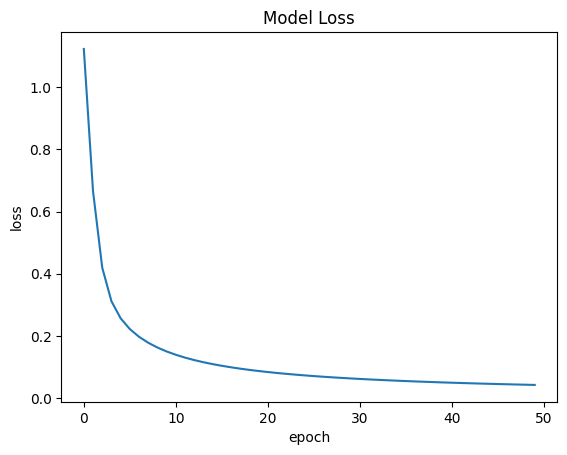

In [ ]:
# Hiển thị loss theo số epoch
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Sau khi đã huấn luyện, ta lưu mô hình về để sau này tái sử dụng
# Lưu ý: hai phương thức lưu mô hình `save` và tải mô hình lên 'load'
# được sử dụng khi muốn tái sử dụng nhiều lần mà KHÔNG CẦN PHẢI HUẤN LUYỆN LẠI
lr.save('logistic_regression_model.h5')

## 5. Trực quan hóa mô hình và dự đoán với dữ liệu test

In [ ]:
# Khởi tạo đối tượng mới và gọi phương thức load mô hình từ file
pretrain_lr = LogisticRegression()
pretrain_lr.load('logistic_regression_model.h5')

In [ ]:
theta = pretrain_lr.get_weights()
print('Tham số tối ưu: ')
print(theta)
bias = theta[1][0] # bias chính là theta0 trong mô hình gốc
theta1 = theta[0][0][0]
theta2 = theta[0][1][0]
print('Trong đó: ')
print('   - bias (hệ số tự do) : ', bias)
print('   - theta1 (hệ số cho dữ liệu x1): ', theta1)
print('   - theta2 (hệ số cho dữ liệu x2): ', theta2)

Tham số tối ưu: 
[array([[-0.9303069],
       [ 0.9272127]], dtype=float32), array([-0.09650145], dtype=float32)]
Trong đó: 
   - bias (hệ số tự do) :  -0.096501455
   - theta1 (hệ số cho dữ liệu x1):  -0.9303069
   - theta2 (hệ số cho dữ liệu x2):  0.9272127


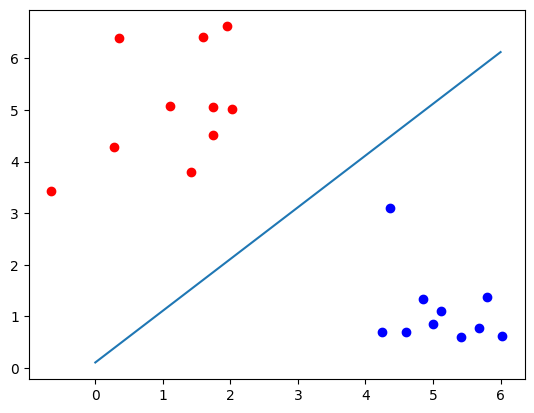

In [ ]:
# Trực quan hóa dữ liệu và mô hình sau khi huấn luyện
plt.plot(red_points[:,0], red_points[:,1], 'ro')
plt.plot(blue_points[:,0], blue_points[:,1], 'bo')

# Trực quan hóa đường thẳng phân lớp 2 tập đỏ, xanh
# Khoảng giá trị nhỏ nhất và lớn nhất mà x1 có thể nhận được từ 0-6
x1=[0, 6]
# Tính giá trị x2 dựa trên phương trình đường thẳng:
# theta1*x1 + theta2*x2 + bias = 0
# => x2 = -(theta1*x1 + bias)/theta2
x2=[-(theta1*x1[0]+bias)/theta2, -(theta1*x1[-1]+bias)/theta2]
plt.plot(x1, x2)
plt.show()

Như vậy ta có thể thấy rằng, các hệ số đã huấn luyện tương ứng đã tạo thành phương trình đường thẳng chia tách các điểm huấn luyện đỏ và xanh.

In [ ]:
# Sai số trung bình khi thử nghiệm trên  tập test:
y_pred = lr.predict(x_test)[:,0]
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print('Giá trị nhãn dự đoán trên tập test: ')
print(y_pred)
print('Giá trị nhãn phát sinh (tập test): ')
print(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Giá trị nhãn dự đoán trên tập test: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Giá trị nhãn phát sinh (tập test): 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Như ta đã thấy, giá trị dự đoán `y_pred` **gần như chính xác** so với dữ liệu phát sinh `y_test`. Sẽ có tình huống `y_pred` không khớp với `y_test`, phụ thuộc vào yếu tố nhiễu khi tạo sinh dữ liệu.

Để tính tổng độ chính xác (Accuracy), ta đếm tổng số mẫu mà giá trị dự đoán khớp với giá trị phát sinh, sau đó chia cho tổng số mẫu:

In [ ]:
def accuracy(y_pred, y_test):
    acc = None
    # Cài đặt biến `acc` chứa độ chính xác theo %
    # với công thức tính bằng tổng số mẫu dự đoán đúng
    # (`y_pred` và `y_test` khớp nhau) chia cho tổng số mẫu
    # của tập test.
    # Lưu ý: giá trị nhỏ nhất là 0%, lớn nhất là 100%
    ### BEGIN SOLUTION
    acc = 100*np.sum(y_pred == y_test)/len(y_test)
    ### END SOLUTION
    return acc

In [ ]:
print("Độ chính xác trên tập test: ", accuracy(y_pred, y_test), "(%)")

Độ chính xác trên tập test:  100.0 (%)


In [ ]:
# Kiểm tra với một số bộ test mở
assert accuracy(np.array([1, 1]), np.array([0, 1])) == 50.0
assert accuracy(np.array([1, 0, 1]), np.array([0, 1, 0])) == 0.0

# PHẦN 3 - CÀI ĐẶT MÔ HÌNH SOFTMAX REGRESSION VỚI KERAS

Một mô hình máy học cần có đủ ít nhất 7 phương thức sau:
- `__init__`: hàm constructor trong hướng đối tượng, được sử dụng để khởi tạo các tham số mặc định hoặc tham số bắt đầu một mô hình. Trong những bài tập đầu tiên, để đơn giản constructor sẽ không sử dụng.
- `build`: xây dựng kiến trúc của mô hình
- `train`: bắt đầu quá trình huấn luyện mô hình
- `save`: lưu lại mô hình sau khi đã huấn luyện
- `load`: load lên mô hình từ file đã huấn luyện (pretrained)
- `summary`: in tóm tắt kiến trúc mô hình
- `predict`: dự đoán giá trị output từ dữ liệu đầu vào

In [ ]:
# Mô hình cài đặt tổng quát bao gồm 7 phương thức cơ bản
# Lưu ý: mô hình này chỉ mang tính gợi ý, không bắt buộc
# Tuy nhiên, trong phần bài tập cần tuân theo các tên phương thức này
class MyModel:
    # constructor
    def __init__(self):
        return None

    # Implement architecture of the model
    def build(self):
        return None

    # Train the defined model with training and validation data
    def train(self):
        return None

    # Save the trained model to file
    def save(self, model_path):
        return None

    # Load pretrained model from file
    def load(self):
        return None

    # Visualize your model
    def summary(self):
        return None

    # Apply your model with new input data
    def predict(self):
        return None

## 1. Import các thư viện Keras

Đầu tiên, ta sẽ import các thư viện, module, hàm của `Keras`:
- `Input`: để nhận dữ liệu đầu vào cho mô hình
- `Dense`: hay còn gọi là lớp Fully Connected (Lớp kết nối đầy đủ), một thành phần quan trọng của các mô hình dựa trên mạng Neural Network.
- `Model`: đây là lớp đối tượng mô hình được sử dụng để đóng gói lớp đầu vào, đầu ra, sau đó huấn luyện với phương thức `fit` và dự đoán kết quả với `predict`.
- `load_model`: hàm sử dụng để load mô hình lên từ file

In [ ]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model
import numpy as np

## 2. Cài đặt mô hình Softmax Regression
Tiếp theo, ta sẽ dựa trên khung đối tượng `MyModel` đã trình bày ở mục trước để tiến hành cài đặt mô hình **Softmax Regression**. Phương thức chính mà bài tập này cần thực hiện là `def build()`. Các phương thức còn lại đã được cài đặt sẵn, các bạn cần đọc, hiểu ý nghĩa và cách thức sử dụng về sau.

<p align="center">
  <img src="./images/SoftmaxReg.png" />
</p>

In [ ]:
# Softmax Regression
class SoftmaxRegression:
    def __init__(self): # Self is similar to your 'this' pointer in C++
        return None

    def build(self, input_dim, output_dim):
        # `input_dim`: kích thước input feature
        # `output_dim`: số phân lớp cần phân loại

        # Khởi tạo model
        self.model = None

        # Hãy cài đặt để định nghĩa KIẾN TRÚC MÔ HÌNH và lưu ở thuộc tính `self.model`
        # với các biến đối tượng sau:
        #  - tạo biến `input` với lớp đối tượng `Input` của Keras,
        #    truyền vào kích thước đầu vào `input_dim`
        #  - tạo biến `output` với lớp đối tượng `Dense` của Keras,
        #    truyền vào các tham số:  kích thước output (chú ý PHÂN LOẠI ĐA LỚP),
        #    có sử dụng bias, CÓ SỬ DỤNG hàm activation là `softmax`.
        # Sau bước này, self.model sẽ đóng gói 2 biến `input` và `output` để tạo thành mô hình
        ### BEGIN SOLUTION
        input = Input(shape=(input_dim,))
        output = Dense(units=output_dim, use_bias=True, activation='softmax')(input)
        self.model = Model(input, output)

        ### END SOLUTION

        return self.model

    def train(self, x_train, y_train):
        opt = tf.keras.optimizers.SGD(learning_rate=0.01) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='categorical_crossentropy') # CCE loss
        return self.model.fit(x_train, y_train, epochs=100)

    def save(self, model_file):
        return self.model.save(model_file)

    def load(self, model_file):
        self.model = load_model(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
        return self.model.predict(x_test)

    def get_weights(self):
        return self.model.layers[1].get_weights()

Tiếp theo, ta sẽ khởi tạo đối tượng SoftmaxRegression và kiểm tra thử xem phương `build` đã cài đặt chính xác chưa.

In [ ]:
sr = SoftmaxRegression()
# Trong ví dụ này, ta sẽ khởi tạo input là một vector 1000 chiều,
# bài toán cần phân loại 20 lớp đối tượng.
sr.build(1000, 20)

<Functional name=functional_5, built=True>

In [ ]:
# Public Test
assert len(sr.model.layers) == 2
assert str(type(sr.model.layers[0])).endswith("input_layer.InputLayer'>") == True
assert str(type(sr.model.layers[1])).endswith("core.dense.Dense'>") == True
assert sr.model.layers[0].input_shape[0][1] == 1000
assert sr.model.layers[1].output_shape[1] == 20
assert sr.model.layers[1].use_bias == True

AttributeError: 'InputLayer' object has no attribute 'input_shape'

## 3. Tạo dữ liệu mẫu (toy example)
Bước tiếp theo, ta sẽ tiến hành tạo mẫu dữ liệu để huấn luyện và kiểm thử.

Dữ liệu được tạo ra là các điểm rải ngẫu nhiên xung quanh 4 cụm điểm:
- [10, -2]
- [2, 8]
- [12, 8]
- [-2, 0]

Lưu ý rằng, 4 cụm điểm này rời nhau đủ xa để khi thêm nhiễu ngẫu nhiên,
các điểm thuộc 4 cụm này vẫn không giao thoa nhau.

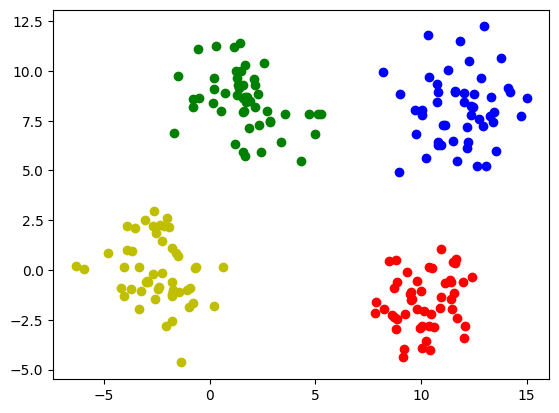

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Số phân lớp: 4
K = 4
# Tạo bộ dữ  liệu gồm 4 điểm
# S1, S2, S3, S4 là tâm của 4 lớp
S1= np.array([[10,-2]])
S2= np.array([[2,8]])
S3= np.array([[12,8]])
S4= np.array([[-2,0]])

# 50 samples mỗi lớp
n_sample = 50
# Phát sinh các điểm với nhiễu ngẫu nhiên xung quanh 4 tâm
pts1 = S1 + np.random.normal(0, 1.5, size=(n_sample,2))
pts2 = S2 + np.random.normal(0, 1.5, size=(n_sample,2))
pts3 = S3 + np.random.normal(0, 1.5, size=(n_sample,2))
pts4 = S4 + np.random.normal(0, 1.5, size=(n_sample,2))

# Nối tất cả các mẫu thành một khối dữ liệu X (input feature) và Y (nhãn)
X_train = np.concatenate((pts1, pts2, pts3, pts4))
# Concatenate data labels to a single input variable Y
Y_train = np.concatenate(([0]*n_sample, [1]*n_sample, [2]*n_sample, [3]*n_sample))

# Chuyển Y từ dạng nhãn sang one-hot vector
Y_train = Y_train.astype(int)
Y_oh = np.zeros((Y_train.size, Y_train.max()+1 ))
Y_oh[np.arange(Y_train.size), Y_train] = 1

# Trực quan hóa dữ liệu bằng các hình tròn màu đỏ, xanh lá, xanh dương và vàng
plt.plot(pts1[:,0], pts1[:,1], 'ro')
plt.plot(pts2[:,0], pts2[:,1], 'go')
plt.plot(pts3[:,0], pts3[:,1], 'bo')
plt.plot(pts4[:,0], pts4[:,1], 'yo')
plt.show()

## 4. Huấn luyện mô hình với dữ liệu mẫu

Tiếp theo, ta sẽ khởi tạo lại mô hình để phù hợp với dữ liệu mẫu đã phát sinh ở bước trước. Việc xây dựng kiến trúc của mô hình phải phù hợp với số chiều của dữ liệu mẫu.

In [ ]:
sr = SoftmaxRegression()

# Hãy gọi phương thức `build` cho đối tượng `sr` và truyền tham số đầu vào
# tương ứng với dữ liệu train đã phát sinh ở code block trên
# Theo bạn, `input_dim` và `output_dim` bằng bao nhiêu?

### BEGIN SOLUTION
sr.build(2, 4)
### END SOLUTION

# Để hiển thị kiến trúc của mô hình ta gọi phương thức `summary`
print("Kiến trúc của mô hình Softmax Regression: ")
sr.summary()

Kiến trúc của mô hình Softmax Regression: 


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Để huấn luyện mô hình ta gọi phương thức `train` với dữ liệu mẫu đã tạo được
# Nếu bước `build` mô hình gọi đúng thì bước `train` sau sẽ thực hiện thành công
# LƯU Ý: Ở đây ta sử dụng output là Y_oh dạng one-hot thay vì dạng nhãn (label)
hist = sr.train(X_train, Y_oh)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 7.0025
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 5.3631
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 3.3577
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 2.0248
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 1.2104
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.8409
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.6726
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.5907
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.4893
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.4681
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.4334
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.4593
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4277
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.4337
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.3530
Epoc

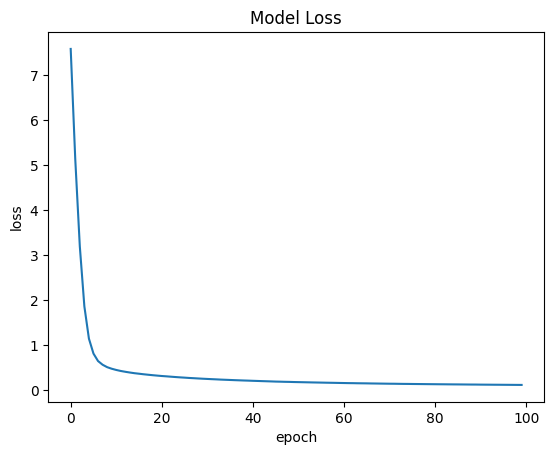

In [ ]:
# Hiển thị loss theo số epoch
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Sau khi đã huấn luyện, ta lưu mô hình về để sau này tái sử dụng
# Lưu ý: hai phương thức lưu mô hình `save` và tải mô hình lên 'load'
# được sử dụng khi muốn tái sử dụng nhiều lần mà KHÔNG CẦN PHẢI HUẤN LUYỆN LẠI
sr.save('softmax_regression_model.h5')

## 5. Trực quan hóa mô hình và dự đoán với dữ liệu test

In [ ]:
# Khởi tạo đối tượng mới và gọi phương thức load mô hình từ file
pretrain_sr = SoftmaxRegression()
pretrain_sr.load('softmax_regression_model.h5')

In [ ]:
# Hiển thị bộ tham số của mô hình Softmax
theta = pretrain_sr.get_weights()
print('Tham số tối ưu: ')
print(theta)

Tham số tối ưu: 
[array([[ 0.5716154 , -0.2921643 ,  0.36394647, -1.2892581 ],
       [-0.55728734,  0.80606544,  0.31189078, -0.24876027]],
      dtype=float32), array([-0.06811127, -0.25827476, -0.18643644,  0.5128224 ], dtype=float32)]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


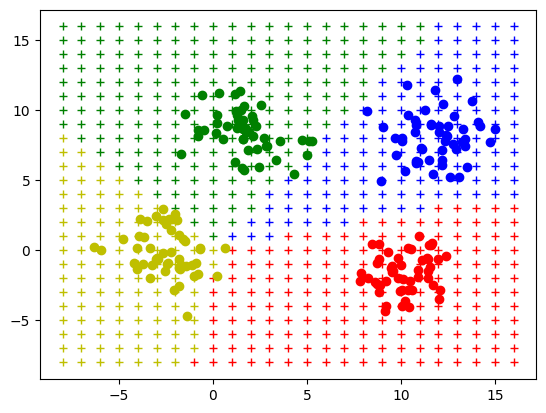

In [ ]:
# Trực quan hóa dữ liệu và mô hình sau khi huấn luyện
# Ý tưởng: lấy mẫu dày đặc các điểm trong phạm vi dữ liệu train
# Sau đó dùng mô hình để dự đoán và hiển thị kết quả

# `colors` là các marker được sử dụng để trực quan hóa kết quả test
colors = ['r+', 'g+', 'b+', 'y+']
# `gt_colors` là các marker được sử dụng để trực quan hóa dữ liệu train
gt_colors = ['ro', 'go', 'bo', 'yo']

# Lấy mẫu dày đặc các điểm
x = np.arange(-8, 17, 1)
y = np.arange(-8, 17, 1)
xx, yy = np.meshgrid(x,y)

xx = xx.reshape(-1)
yy = yy.reshape(-1)

# Tạo các dữ liệu test dày đặc
X_test = np.concatenate([[xx],[yy]], axis=0).T
Y_pred = pretrain_sr.predict(X_test)

for i in range(len(xx)):
    plt.plot(xx[i],yy[i], colors[np.argmax(Y_pred[i])])
plt.plot(pts1[:,0], pts1[:,1], gt_colors[0])
plt.plot(pts2[:,0], pts2[:,1], gt_colors[1])
plt.plot(pts3[:,0], pts3[:,1], gt_colors[2])
plt.plot(pts4[:,0], pts4[:,1], gt_colors[3])
plt.show()

Như vậy ta có thể thấy rằng, không gian mặt phẳng đã được phân loại sử dụng mô hình đã huấn luyện trước đó với Softmax Regression. Dựa trên hình trên ta thấy kết quả khá chính xác, chỉ trừ một số điểm ở biên giữa các lớp.

# PHẦN 4 - CÀI ĐẶT MÔ HÌNH NEURAL NETWORK VỚI KERAS

Một mô hình máy học cần có đủ ít nhất 7 phương thức sau:
- `__init__`: hàm constructor trong hướng đối tượng, được sử dụng để khởi tạo các tham số mặc định hoặc tham số bắt đầu một mô hình. Trong những bài tập đầu tiên, để đơn giản constructor sẽ không sử dụng.
- `build`: xây dựng kiến trúc của mô hình
- `train`: bắt đầu quá trình huấn luyện mô hình
- `save`: lưu lại mô hình sau khi đã huấn luyện
- `load`: load lên mô hình từ file đã huấn luyện (pretrained)
- `summary`: in tóm tắt kiến trúc mô hình
- `predict`: dự đoán giá trị output từ dữ liệu đầu vào

In [ ]:
# Mô hình cài đặt tổng quát bao gồm 7 phương thức cơ bản
# Lưu ý: mô hình này chỉ mang tính gợi ý, không bắt buộc
# Tuy nhiên, trong phần bài tập cần tuân theo các tên phương thức này
class MyModel:
    # constructor
    def __init__(self):
        return None

    # Implement architecture of the model
    def build(self):
        return None

    # Train the defined model with training and validation data
    def train(self):
        return None

    # Save the trained model to file
    def save(self, model_path):
        return None

    # Load pretrained model from file
    def load(self):
        return None

    # Visualize your model
    def summary(self):
        return None

    # Apply your model with new input data
    def predict(self):
        return None

## 1. Import các thư viện Keras

Đầu tiên, ta sẽ import các thư viện, module, hàm của `Keras`:
- `Input`: để nhận dữ liệu đầu vào cho mô hình
- `Dense`: hay còn gọi là lớp Fully Connected (Lớp kết nối đầy đủ), một thành phần quan trọng của các mô hình dựa trên mạng Neural Network.
- `Model`: đây là lớp đối tượng mô hình được sử dụng để đóng gói lớp đầu vào, đầu ra, sau đó huấn luyện với phương thức `fit` và dự đoán kết quả với `predict`.
- `load_model`: hàm sử dụng để load mô hình lên từ file

In [ ]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model
import numpy as np

## 2. Cài đặt mô hình Neural Network
Tiếp theo, ta sẽ dựa trên khung đối tượng `MyModel` đã trình bày ở mục trước để tiến hành cài đặt mô hình **Neural Network**. Phương thức chính mà bài tập này cần thực hiện là `def build()`. Các phương thức còn lại đã được cài đặt sẵn, các bạn cần đọc, hiểu ý nghĩa và cách thức sử dụng về sau.

<p align="center">
  <img src="./images/NeuralNet.png" />
</p>

In [ ]:
# Neural Network
class NeuralNetwork:
    def __init__(self): # Self is similar to your 'this' pointer in C++
        return None

    def build(self, input_dim, output_dim, n_hidden, n_neurons):
        # `input_dim`: kích thước input feature
        # `output_dim`: số phân lớp cần phân loại
        # `n_hidden`: số lượng lớp ẩn
        # `n_neurons`: số lượng neuron mỗi lớp ẩn

        # Khởi tạo model
        self.model = None

        # Hãy cài đặt để định nghĩa KIẾN TRÚC MÔ HÌNH và lưu ở thuộc tính `self.model`
        # với các biến đối tượng sau:
        #  - tạo biến `input` với lớp đối tượng `Input` của Keras,
        #    truyền vào kích thước đầu vào `input_dim`
        #  - tạo `n_hidden`lớp ẩn biết rằng, mỗi lớp ẩn có `n_neurons`, có sử dụng bias
        #    activation là hàm `sigmoid`. Đầu ra của lớp ẩn này là đầu vào lớp ẩn sau.
        #  - tạo biến `output` với lớp đối tượng `Dense` của Keras,
        #    truyền vào các tham số:  kích thước output (chú ý PHÂN LOẠI ĐA LỚP),
        #    có sử dụng bias, CÓ SỬ DỤNG hàm activation là `softmax`. Đầu vào của lớp
        #    output chính là lớp ẩn cuối cùng.
        # Sau bước này, self.model sẽ đóng gói 2 biến `input` và `output` để tạo thành mô hình
        ### BEGIN SOLUTION
        input = Input(shape=(input_dim,)) 
        layer1 = input
        for i in range(n_hidden):
            layer1 = Dense(units=n_neurons, use_bias=True, activation="sigmoid")(layer1)
        output = Dense(units=output_dim, use_bias=True, activation="softmax")(layer1)
        self.model = Model(input, output)
        ### END SOLUTION

        return self.model

    def train(self, x_train, y_train, epochs=500):
        # Khởi tạo mặc định với số `epochs=50`, `learning_rate=0.05`
        opt = tf.keras.optimizers.SGD(learning_rate=0.05) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='categorical_crossentropy') # CCE loss
        return self.model.fit(x_train, y_train, epochs=epochs)

    def save(self, model_file):
        return self.model.save(model_file)

    def load(self, model_file):
        self.model = load_model(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
        return self.model.predict(x_test)

    def get_weights(self, layer_id):
        return self.model.layers[layer_id].get_weights()

Tiếp theo, ta sẽ khởi tạo đối tượng NeuralNetwork và kiểm tra thử xem phương `build` đã cài đặt chính xác chưa.

In [ ]:
nn = NeuralNetwork()
# Trong ví dụ này, ta sẽ khởi tạo input là một vector 1000 chiều,
# bài toán cần phân loại 20 lớp đối tượng. Số lượng lớp ẩn là 3
# và số neuron mỗi lớp ẩn là  10.
nn.build(1000, 20, 3, 10)

<Functional name=functional_7, built=True>

## 3. Tạo dữ liệu mẫu (toy example)
Bước tiếp theo, ta sẽ tiến hành tạo mẫu dữ liệu để huấn luyện và kiểm thử.

Dữ liệu được tạo ra là các điểm rải ngẫu nhiên xung quanh 4 cụm điểm:
- [10, -2]
- [2, 8]
- [12, 8]
- [-2, 0]

Lưu ý rằng, 4 cụm điểm này rời nhau đủ xa để khi thêm nhiễu ngẫu nhiên,
các điểm thuộc 4 cụm này vẫn không giao thoa nhau.

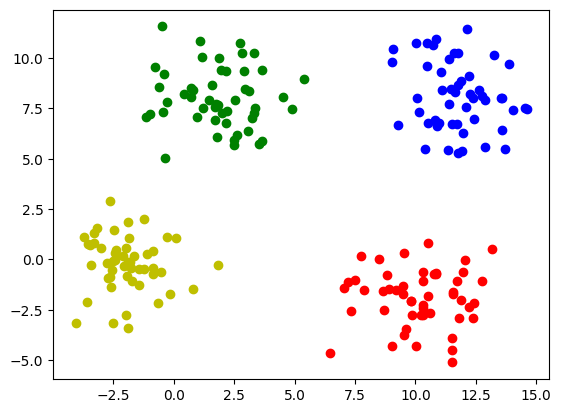

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Số phân lớp: 4
K = 4
# Tạo bộ dữ  liệu gồm 4 điểm
# S1, S2, S3, S4 là tâm của 4 lớp
S1= np.array([[10,-2]])
S2= np.array([[2,8]])
S3= np.array([[12,8]])
S4= np.array([[-2,0]])

# 50 samples mỗi lớp
n_sample = 50
# Phát sinh các điểm với nhiễu ngẫu nhiên xung quanh 4 tâm
pts1 = S1 + np.random.normal(0, 1.5, size=(n_sample,2))
pts2 = S2 + np.random.normal(0, 1.5, size=(n_sample,2))
pts3 = S3 + np.random.normal(0, 1.5, size=(n_sample,2))
pts4 = S4 + np.random.normal(0, 1.5, size=(n_sample,2))

# Nối tất cả các mẫu thành một khối dữ liệu X (input feature) và Y (nhãn)
X_train = np.concatenate((pts1, pts2, pts3, pts4))
# Concatenate data labels to a single input variable Y
Y_train = np.concatenate(([0]*n_sample, [1]*n_sample, [2]*n_sample, [3]*n_sample))

# Chuyển Y từ dạng nhãn sang one-hot vector
Y_train = Y_train.astype(int)
Y_oh = np.zeros((Y_train.size, Y_train.max()+1 ))
Y_oh[np.arange(Y_train.size), Y_train] = 1

# Trực quan hóa dữ liệu bằng các hình tròn màu đỏ, xanh lá, xanh dương và vàng
plt.plot(pts1[:,0], pts1[:,1], 'ro')
plt.plot(pts2[:,0], pts2[:,1], 'go')
plt.plot(pts3[:,0], pts3[:,1], 'bo')
plt.plot(pts4[:,0], pts4[:,1], 'yo')
plt.show()

## 4. Huấn luyện mô hình với dữ liệu mẫu

Tiếp theo, ta sẽ khởi tạo lại mô hình để phù hợp với dữ liệu mẫu đã phát sinh ở bước trước. Việc xây dựng kiến trúc của mô hình phải phù hợp với số chiều của dữ liệu mẫu.

In [ ]:
nn = NeuralNetwork()

# Hãy gọi phương thức `build` cho đối tượng `sr` và truyền tham số đầu vào
# tương ứng với dữ liệu train đã phát sinh ở code block trên
# Theo bạn, `input_dim`, `output_dim` bằng bao nhiêu?
# Đối với các lớp ẩn, ta khởi tạo 01 lớp ẩn và 03 neuron cho mỗi lớp ẩn

### BEGIN SOLUTION
input_dim = 2
output_dim = 4
n_hidden = 1
n_neurons = 3 
nn.build(input_dim, output_dim, n_hidden, n_neurons)
### END SOLUTION

# Để hiển thị kiến trúc của mô hình ta gọi phương thức `summary`
print("Kiến trúc của mô hình Neural Network: ")
nn.summary()

Kiến trúc của mô hình Neural Network: 
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_16 (Dense)            (None, 3)                 9         
                                                                 
 dense_17 (Dense)            (None, 4)                 16        
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Để huấn luyện mô hình ta gọi phương thức `train` với dữ liệu mẫu đã tạo được
# Nếu bước `build` mô hình gọi đúng thì bước `train` sau sẽ thực hiện thành công
# LƯU Ý: Ở đây ta sử dụng output là Y_oh dạng one-hot thay vì dạng nhãn (label)
hist = nn.train(X_train, Y_oh)

Epoch 1/500
7/7 [==============================] - 1s 4ms/step - loss: 1.2919
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 1.2531
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 1.2209
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 1.1961
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 1.1740
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 1.1520
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 1.1319
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 1.1103
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 1.0908
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 1.0711
Epoch 11/500
7/7 [==============================] - 0s 4ms/step - loss: 1.0530
Epoch 12/500
7/7 [==============================] - 0s 3ms/step - loss: 1.0342
Epoch 13/500
7/7 [==============================] - 0s 3ms/st

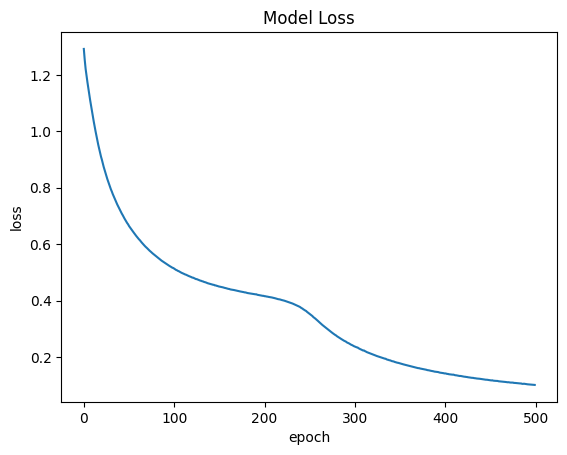

In [ ]:
# Hiển thị loss theo số epoch
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Sau khi đã huấn luyện, ta lưu mô hình về để sau này tái sử dụng
# Lưu ý: hai phương thức lưu mô hình `save` và tải mô hình lên 'load'
# được sử dụng khi muốn tái sử dụng nhiều lần mà KHÔNG CẦN PHẢI HUẤN LUYỆN LẠI
nn.save('neural_network_model.h5')

## 5. Trực quan hóa mô hình và dự đoán với dữ liệu test

In [ ]:
# Khởi tạo đối tượng mới và gọi phương thức load mô hình từ file
pretrain_nn = NeuralNetwork()
pretrain_nn.load('neural_network_model.h5')

In [ ]:
# In ra bộ tham số tối ưu lớp cuối cùng
theta = pretrain_nn.get_weights(-1)
print('Tham số tối ưu: ')
print(theta)

Tham số tối ưu: 
[array([[ 1.9414424 , -5.2620373 ,  0.69182265,  1.5191894 ],
       [ 2.1154482 ,  2.0051203 ,  1.6774333 , -5.2255864 ],
       [-4.4710045 ,  1.931822  ,  1.6604184 ,  1.1993002 ]],
      dtype=float32), array([-0.47585565,  0.4395147 , -1.7391059 ,  1.7754488 ], dtype=float32)]


20/20 [==============================] - 0s 2ms/step


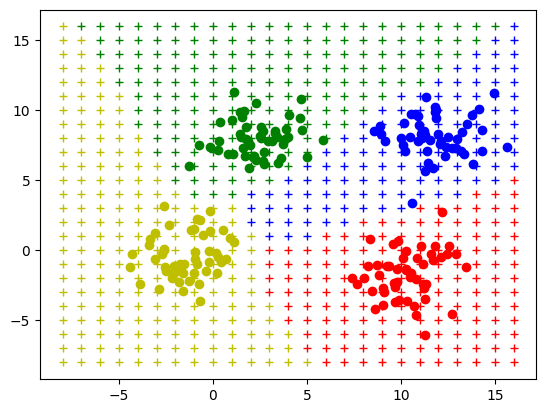

In [ ]:
# Trực quan hóa dữ liệu và mô hình sau khi huấn luyện
# Ý tưởng: lấy mẫu dày đặc các điểm trong phạm vi dữ liệu train
# Sau đó dùng mô hình để dự đoán và hiển thị kết quả

# `colors` là các marker được sử dụng để trực quan hóa kết quả test
colors = ['r+', 'g+', 'b+', 'y+']
# `gt_colors` là các marker được sử dụng để trực quan hóa dữ liệu train
gt_colors = ['ro', 'go', 'bo', 'yo']

# Lấy mẫu dày đặc các điểm
x = np.arange(-8, 17, 1)
y = np.arange(-8, 17, 1)
xx, yy = np.meshgrid(x,y)

xx = xx.reshape(-1)
yy = yy.reshape(-1)

# Tạo các dữ liệu test dày đặc
X_test = np.concatenate([[xx],[yy]], axis=0).T
Y_pred = pretrain_nn.predict(X_test)

for i in range(len(xx)):
    plt.plot(xx[i],yy[i], colors[np.argmax(Y_pred[i])])
plt.plot(pts1[:,0], pts1[:,1], gt_colors[0])
plt.plot(pts2[:,0], pts2[:,1], gt_colors[1])
plt.plot(pts3[:,0], pts3[:,1], gt_colors[2])
plt.plot(pts4[:,0], pts4[:,1], gt_colors[3])
plt.show()

Ta có thể thấy rằng, không gian mặt phẳng đã được phân loại sử dụng mô hình Neural Network đã huấn luyện trước đó. Dựa trên hình trên ta thấy kết quả khá chính xác, chỉ trừ một số điểm ở biên giữa các lớp.

## 6. Thử nghiệm với tập dữ liệu  MNIST

MNIST là tập dữ liệu chữ số viết tay kinh điển trong lĩnh vực máy học. Để tải và sử dụng dữ liệu này cực kỳ đơn giản chỉ với 2 dòng code:

In [ ]:
# Prepare MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Để hiểu rõ hơn về dữ liệu này, ta sẽ trực quan hóa dữ liệu bằng cách hiển thị ảnh và xem kích thước ảnh.

Nhãn của mẫu dữ liệu thứ 1234:  3
Kích thước của ảnh train:  (28, 28)
Số điểm ảnh nếu biến đổi thành vector:  784


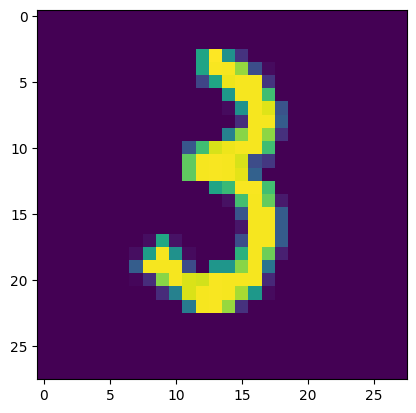

In [ ]:
plt.imshow(x_train[1234])
print('Nhãn của mẫu dữ liệu thứ 1234: ', y_train[1234])
print('Kích thước của ảnh train: ', x_train[1234].shape)
print('Số điểm ảnh nếu biến đổi thành vector: ',
      x_train[1234].shape[0]*x_train[1234].shape[1])

Tiền xử lý dữ liệu trước khi huấn luyện mô hình:
- Chuyển output sang dạng one-hot vector
- Chuẩn hóa dữ liệu input về khoảng giá trị `[0-1]`

In [ ]:
# Hàm chuyển đổi output từ dạng nhãn (label) sang vector one-hot
def onehot(y):
    oh = np.zeros((y.shape[0], y.max()+1))
    oh[np.arange(y.shape[0]), y] = 1
    return oh

y_train_oh = onehot(y_train)
y_test_oh = onehot(y_test)

# Chuẩn hóa dữ liệu input trên dữ liệu train và test
n_train_sample, h, w = x_train.shape
n_test_sample, _,_ = x_test.shape # Kích thước ngang x cao giống nhau trên tất cả mẫu

x_train = (x_train.astype('float32')) / 255.0
x_test = (x_test.astype('float32')) / 255.0
x_train_vec = x_train.reshape((n_train_sample, w*h))
x_test_vec = x_test.reshape((n_test_sample, w*h))

Khởi tạo mô hình từ đầu sao cho phù hợp với dữ liệu MNIST.
Trong đó, thông tin cấu hình về lớp ẩn:
- 2 lớp ẩn
- 100 neuron mỗi lớp ẩn
- huấn luyện với 30 epochs

In [ ]:
nn4mnist = NeuralNetwork()

# Hoàn tất đoạn code sau đây với việc sử dụng biến `nn4mnist` để gọi
# phương thức `build`# và `train`. Lưu ý: sử dụng các tham số phù hợp
# theo yêu cầu đã nêu.

### BEGIN SOLUTION


### END SOLUTION

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2833
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4490
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3445
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3048
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2788
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2573
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2388
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2215
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2066
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1928
Epoch 11/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1811
Epoch 12/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1699


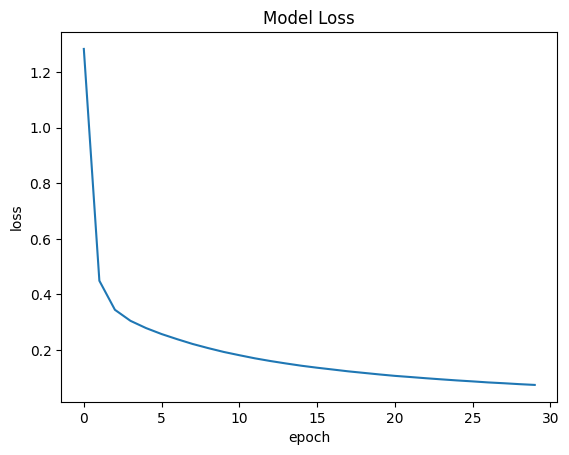

In [ ]:
# Trực quan hóa giá trị loss trong quá trình huấn luyện
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Public Test
assert hist is not None
assert 'loss' in hist.history
assert len(hist.history['loss']) == 30

Sau quá trình huấn luyện, chúng ta sử dụng mô hình để dự đoán trên mẫu dữ liệu test:

In [ ]:
pred = nn4mnist.predict(x_test_vec)

313/313 [==============================] - 1s 3ms/step


Cuối cùng, trực quan hóa một mẫu dữ liệu test bất kỳ (ví dụ mẫu thứ 50):

Label of the data:  6
Predicted label of the data:  6


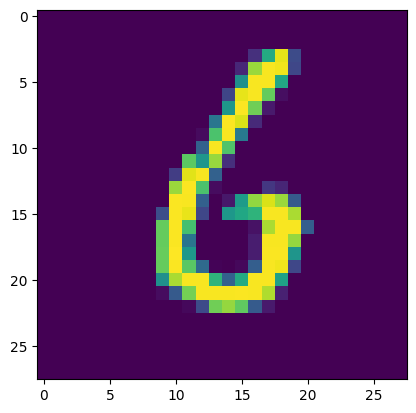

In [ ]:
# Show the 50-th test sample
test_id = 50
plt.imshow(x_test[test_id])
print('Label of the data: ', y_test[test_id])
print('Predicted label of the data: ', np.argmax(pred[test_id]))